In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import f1_score
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_recall_curve

def Draw_ROC(Y_prob, Y_observed, model_name = 'Model'):
    ns_probs = [0 for _ in range(len(Y_observed))]
    # calculate scores
    ns_auc = roc_auc_score(Y_observed, ns_probs)
    lr_auc = roc_auc_score(Y_observed, Y_prob)
    # summarize scores
    print('Chance: ROC AUC=%.3f' % (ns_auc))
    print('%s: ROC AUC=%.3f' % (model_name, lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_observed, ns_probs, pos_label=1)
    lr_fpr, lr_tpr, _ = roc_curve(Y_observed, Y_prob, pos_label=1)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Chance')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.title('Receiver operating characteristic curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

def Draw_PR(Y_prob, Y_predicted, Y_observed, model_name = 'Model'):
    # predict class values
    lr_precision, lr_recall, _ = precision_recall_curve(Y_observed, Y_prob, pos_label=1)
    lr_f1, lr_auc = f1_score(Y_observed, Y_predicted), auc(lr_recall, lr_precision)
    # summarize scores
    print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len(Y_observed[Y_observed==1]) / len(Y_observed)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Chance')
    plt.plot(lr_recall, lr_precision, marker='.', label=model_name)
    # axis labels
    plt.title('2-class Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../Data/train.csv', header=0)
X = df.iloc[:,0:-1].copy()
Y = df.iloc[:, -1].copy()

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

df = pd.read_csv('../Data/validation_under.csv', header=0)
X_valid = df.iloc[:,0:-1].copy()
Y_valid = df.iloc[:, -1].copy()
#scaler = StandardScaler()
#X_valid = scaler.fit_transform(X_valid)

# Handle the dataset with undersampling strategy
rus = RandomUnderSampler(sampling_strategy=0.8)
X_res, Y_res = rus.fit_resample(X, Y)

# Handle the dataset with oversampling strategy
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Handle the dataset with SMOTE
SM = SMOTE(random_state=0)
X_smote, Y_smote = SM.fit_sample(X, Y)

score_infor = [[],[],[],[]]
roc_auc_score_infor = [[],[],[],[]]
f1_score_infor = [[],[],[],[]]
models = [[],[],[],[]]

In [3]:
#print(pd.value_counts(Y_smote))
for weight_percent in range(1, 100):

    class_weight = {0: weight_percent, 1: (100-weight_percent)}

    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X, Y)
    #classifier_probs = classifier.predict_proba(X_valid)
    #print("Classifer with balanced class weight only: ")
    Y_predit = classifier.predict(X_valid)
    #Y_prob = classifier.predict_proba(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    report = classification_report(Y_valid, Y_predit, output_dict = True)
    f1_score_infor[0].append(report['1']['f1-score'])
    #print(report)
    #print(f1_score_infor[0])
    score_infor[0].append(report)
    roc_auc_score_infor[0].append(roc_auc_score(Y_valid, Y_predit))
    models[0].append(classifier)
    #print(pd.value_counts(Y_res))
    #Draw_ROC(Y_prob[:, 1], Y_valid, 'Model selected by roc_auc_score')
    #Draw_PR(Y_prob[:, 1], Y_predit, Y_valid, 'Model selected by roc_auc_score')

    #class_weight = {0: 5, 1: 4}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_res, Y_res)
    #print("Classifer with undersampling dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    #roc_auc_score(Y_valid, Y_predit)
    report = classification_report(Y_valid, Y_predit, output_dict = True)
    f1_score_infor[1].append(report['1']['f1-score'])
    score_infor[1].append(report)
    roc_auc_score_infor[1].append(roc_auc_score(Y_valid, Y_predit))
    models[1].append(classifier)

    #print(pd.value_counts(Y_resampled))

    #class_weight = {0: 90, 1: 10}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_resampled, Y_resampled)
    #print("Classifer with oversampling dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    report = classification_report(Y_valid, Y_predit, output_dict = True)
    f1_score_infor[2].append(report['1']['f1-score'])
    score_infor[2].append(report)
    roc_auc_score_infor[2].append(roc_auc_score(Y_valid, Y_predit))
    models[2].append(classifier)

    #class_weight = {0: 90, 1: 10}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_smote, Y_smote)
    #print("Classifer with SMOTE on dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    report = classification_report(Y_valid, Y_predit, output_dict = True)
    f1_score_infor[3].append(report['1']['f1-score'])
    score_infor[3].append(report)
    roc_auc_score_infor[3].append(roc_auc_score(Y_valid, Y_predit))
    models[3].append(classifier)

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


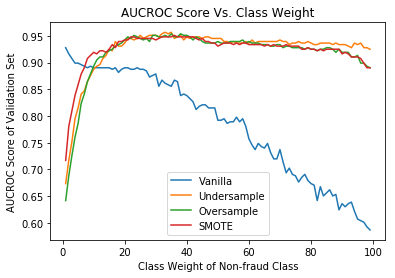

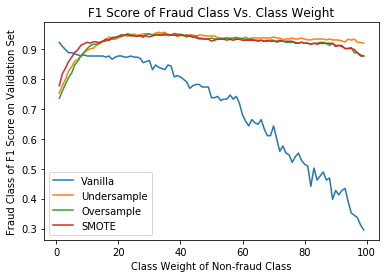

0
32
34
35
[0.9277456647398844, 0.9566473988439306, 0.9537572254335259, 0.9508670520231214]
{'0': {'f1-score': 0.9326145552560646, 'support': 173, 'precision': 0.8737373737373737, 'recall': 1.0}, 'accuracy': 0.9277456647398844, '1': {'f1-score': 0.9221183800623053, 'support': 173, 'precision': 1.0, 'recall': 0.8554913294797688}, 'macro avg': {'f1-score': 0.927366467659185, 'support': 346, 'precision': 0.9368686868686869, 'recall': 0.9277456647398844}, 'weighted avg': {'f1-score': 0.927366467659185, 'support': 346, 'precision': 0.9368686868686869, 'recall': 0.9277456647398844}}
{'0': {'f1-score': 0.9572649572649572, 'support': 173, 'precision': 0.9438202247191011, 'recall': 0.9710982658959537}, 'accuracy': 0.9566473988439307, '1': {'f1-score': 0.9560117302052786, 'support': 173, 'precision': 0.9702380952380952, 'recall': 0.9421965317919075}, 'macro avg': {'f1-score': 0.9566383437351179, 'support': 346, 'precision': 0.9570291599785982, 'recall': 0.9566473988439306}, 'weighted avg': {'f1-

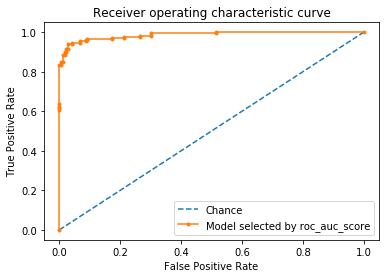

Logistic: f1=0.956 auc=0.989


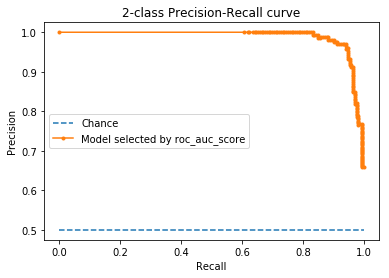

Chance: ROC AUC=0.500
Model selected by f1_score: ROC AUC=0.986


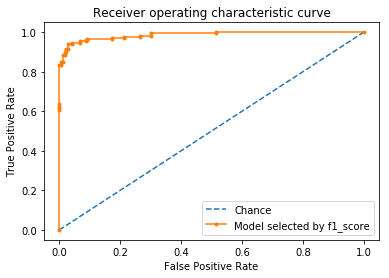

Logistic: f1=0.956 auc=0.989


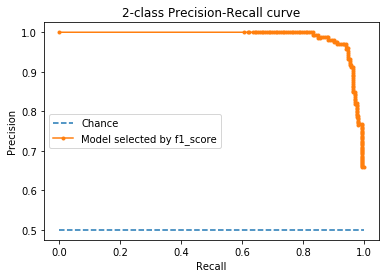

Check overfitting
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       173
           1       0.97      0.94      0.96       173

    accuracy                           0.96       346
   macro avg       0.96      0.96      0.96       346
weighted avg       0.96      0.96      0.96       346

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       398
           1       0.96      0.93      0.95       319

    accuracy                           0.95       717
   macro avg       0.95      0.95      0.95       717
weighted avg       0.95      0.95      0.95       717

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       173
           1       0.97      0.94      0.96       173

    accuracy                           0.96       346
   macro avg       0.96      0.96      0.96       346
weighted avg       0.96      0.96      0.96       346

 

In [4]:
x = np.linspace(1, 99, num=99)
plt.title('AUCROC Score Vs. Class Weight')
plt.xlabel('Class Weight of Non-fraud Class')
plt.ylabel('AUCROC Score of Validation Set')
plt.plot(x, roc_auc_score_infor[0], label="Vanilla")
plt.plot(x, roc_auc_score_infor[1], label="Undersample")
plt.plot(x, roc_auc_score_infor[2], label="Oversample")
plt.plot(x, roc_auc_score_infor[3], label="SMOTE")
plt.legend(loc='best')
plt.show()

plt.title('F1 Score of Fraud Class Vs. Class Weight')
plt.xlabel('Class Weight of Non-fraud Class')
plt.ylabel('Fraud Class of F1 Score on Validation Set')
plt.plot(x, f1_score_infor[0], label="Vanilla")
plt.plot(x, f1_score_infor[1], label="Undersample")
plt.plot(x, f1_score_infor[2], label="Oversample")
plt.plot(x, f1_score_infor[3], label="SMOTE")
plt.legend(loc='best')
plt.show()

maxpos_0 = roc_auc_score_infor[0].index(max(roc_auc_score_infor[0]))
maxpos_1 = roc_auc_score_infor[1].index(max(roc_auc_score_infor[1]))
maxpos_2 = roc_auc_score_infor[2].index(max(roc_auc_score_infor[2]))
maxpos_3 = roc_auc_score_infor[3].index(max(roc_auc_score_infor[3]))
model_index_rocaucscore = [maxpos_0, maxpos_1, maxpos_2, maxpos_3]
print(maxpos_0)
print(maxpos_1)
print(maxpos_2)
print(maxpos_3)
best_roc_auc_scores = [roc_auc_score_infor[0][maxpos_0], roc_auc_score_infor[1][maxpos_1], roc_auc_score_infor[2][maxpos_2], roc_auc_score_infor[3][maxpos_3]]
print(best_roc_auc_scores)
best_roc_auc_score = best_roc_auc_scores.index(max(best_roc_auc_scores))
print(score_infor[0][maxpos_0])
print(score_infor[1][maxpos_1])
print(score_infor[2][maxpos_2])
print(score_infor[3][maxpos_3])

best_model_aucrocscore = models[best_roc_auc_score][model_index_rocaucscore[best_roc_auc_score]]

maxpos_0 = f1_score_infor[0].index(max(f1_score_infor[0]))
maxpos_1 = f1_score_infor[1].index(max(f1_score_infor[1]))
maxpos_2 = f1_score_infor[2].index(max(f1_score_infor[2]))
maxpos_3 = f1_score_infor[3].index(max(f1_score_infor[3]))
model_index_f1 = [maxpos_0, maxpos_1, maxpos_2, maxpos_3]
print(maxpos_0)
print(maxpos_1)
print(maxpos_2)
print(maxpos_3)
best_f1_scores = [f1_score_infor[0][maxpos_0], f1_score_infor[1][maxpos_1], f1_score_infor[2][maxpos_2], f1_score_infor[3][maxpos_3]]
print(best_f1_scores)
best_f1_score = best_f1_scores.index(max(best_f1_scores))
print(score_infor[0][maxpos_0])
print(score_infor[1][maxpos_1])
print(score_infor[2][maxpos_2])
print(score_infor[3][maxpos_3])

best_model_f1score = models[best_f1_score][model_index_f1[best_f1_score]]

Y_predit = best_model_aucrocscore.predict(X_valid)
Y_prob = best_model_aucrocscore.predict_proba(X_valid)
Draw_ROC(Y_prob[:, 1], Y_valid, 'Model selected by roc_auc_score')
Draw_PR(Y_prob[:, 1], Y_predit, Y_valid, 'Model selected by roc_auc_score')

Y_predit = best_model_f1score.predict(X_valid)
Y_prob = best_model_f1score.predict_proba(X_valid)
Draw_ROC(Y_prob[:, 1], Y_valid, 'Model selected by f1_score')
Draw_PR(Y_prob[:, 1], Y_predit, Y_valid, 'Model selected by f1_score')

print("Check overfitting")
print(classification_report(Y_valid, best_model_aucrocscore.predict(X_valid)))
reports = [classification_report(Y, best_model_aucrocscore.predict(X)), classification_report(Y_res, best_model_aucrocscore.predict(X_res)), classification_report(Y_resampled, best_model_aucrocscore.predict(X_resampled)), classification_report(Y_smote, best_model_aucrocscore.predict(X_smote))]
print(reports[best_f1_score])

print(classification_report(Y_valid, best_model_f1score.predict(X_valid)))
reports = [classification_report(Y, best_model_f1score.predict(X)), classification_report(Y_res, best_model_f1score.predict(X_res)), classification_report(Y_resampled, best_model_f1score.predict(X_resampled)), classification_report(Y_smote, best_model_f1score.predict(X_smote))]
print(reports[best_f1_score])